In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import numpy
import pandas
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot
heart = pd.read_csv("../input/heart-disease-dataset/heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
def pca(X,L):
    print ("Data size (features,samples):", X.shape)
    T = X.shape[1]
    mu = np.mean(X,axis=1)
    print ("Mean size:", mu.shape)
    X = X - mu[:,np.newaxis]
    C = 1./float(T)*np.dot(X,X.T)
    print ("Covariance size:", C.shape)
    evals,evecs = np.linalg.eig(C,)
    W = evecs[:,:L]
    z = np.dot(W.T,X)
    return W,z,mu,evals

In [5]:
print (heart.shape)
features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
            'slope', 'ca', 'thal']

x = heart.loc[:, features].values
xTrain, xTest = train_test_split(x, test_size=0.2, random_state=1)
xTrain = xTrain.T
xTest = xTest.T
n_test = xTest.shape[1]
W,_,mu,evals = pca(xTrain,200)

(1025, 14)
Data size (features,samples): (12, 820)
Mean size: (12,)
Covariance size: (12, 12)


In [6]:
def project(x,mu,W):
    z = np.dot(W.T,x - mu[:,np.newaxis])
    reconstruction = np.dot(W,z) + mu[:,np.newaxis]
    return z,reconstruction

1 31.966657191793246
2 97.77586127193908
3 61.15396587566976
4 31.785084598668632
5 6.208292871056195
6 4.872398907137703
7 3.6860363461752934
8 3.367649579631506
9 1.7107315500683784
10 0.4591421712798493
11 0.0019268761255061427
12 7.150195862004584e-27
13 7.150195862004584e-27
14 7.150195862004584e-27
15 7.150195862004584e-27
16 7.150195862004584e-27
17 7.150195862004584e-27
18 7.150195862004584e-27
19 7.150195862004584e-27
20 7.150195862004584e-27
21 7.150195862004584e-27
22 7.150195862004584e-27
23 7.150195862004584e-27
24 7.150195862004584e-27
25 7.150195862004584e-27
26 7.150195862004584e-27
27 7.150195862004584e-27
28 7.150195862004584e-27
29 7.150195862004584e-27
30 7.150195862004584e-27
31 7.150195862004584e-27
32 7.150195862004584e-27
33 7.150195862004584e-27
34 7.150195862004584e-27
35 7.150195862004584e-27
36 7.150195862004584e-27
37 7.150195862004584e-27
38 7.150195862004584e-27
39 7.150195862004584e-27
40 7.150195862004584e-27
41 7.150195862004584e-27
42 7.15019586200458

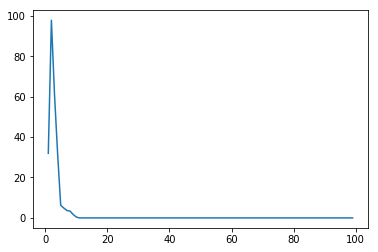

In [7]:
err = []
for L in range(5,100):
    _,reconstruction = project(xTest,mu,W[:,:L])
    residual = xTest - reconstruction
    err.append(1.0/n_test*np.sum(np.sum(residual)**2.0))
    print (str(L),str(err[-1]))
plot(range(5,100),err)